# Nelson-Siegel-Svensson from the German Bundesbank
Thomas Viehmann <tv@interesting-rates.de>

We quickly implement the Nelson-Siegel-Svensson method and calculate the German Bundesbank's Bund yield curves from the parameters.


In [78]:
import pandas
import numpy
import urllib.request
from matplotlib import pyplot
%matplotlib inline

We download the parameters from the Bundesbank in CSV format.

In [105]:
df = pandas.read_csv(urllib.request.urlopen("http://www.bundesbank.de/cae/servlet/StatisticDownload?tsId=BBK01.WZ9801&tsId=BBK01.WZ9802&tsId=BBK01.WZ9803&tsId=BBK01.WZ9804&tsId=BBK01.WZ9805&tsId=BBK01.WZ9806&its_csvFormat=en&its_fileFormat=csv&mode=its&its_dateFormat=dateOfDay"), index_col=0)
df.drop([x for x in df.columns if x.endswith("_FLAGS")],axis=1, inplace=True)
mapping = dict((df.iloc[0].dropna().apply(lambda x: x.split(" / ")[1].split()[1])).items())
df.columns = [mapping.get(x,x).lower() for x in df.columns]
df = df.iloc[4:]
df = df.apply(lambda x: x.astype(float))
df.index = pandas.to_datetime(df.index)


Let us see what we got:

In [106]:
df

,beta0,beta1,beta2,tau1,beta3,tau2
1972-09-30,8.58387,30.00000,-29.88450,0.36495,-13.91200,0.36543
1972-10-31,8.52889,29.58953,28.98429,0.00481,-7.48676,0.26523
1972-11-30,8.80418,29.92019,-20.51146,0.51241,-30.00000,0.24715
1972-12-31,9.43739,-7.46531,-20.48638,1.29510,28.55031,1.01820
1973-01-31,11.61329,-4.48145,-8.47201,0.52885,-7.08296,4.69237
1973-02-28,11.45540,13.02996,-30.00000,0.39174,-7.29206,5.24815
1973-03-31,11.44706,-6.15884,28.95551,2.46182,-30.00000,3.09107
1973-04-30,8.90814,-12.64824,-10.75908,0.58485,30.00000,0.42540
1973-05-31,10.36056,21.01261,-30.00000,0.12923,-2.28758,3.54882
1973-06-30,10.30138,19.20941,-24.00549,0.44307,-1.48525,1.65952


We define the [Nelson-Siegel-Svensson](https://en.wikipedia.org/wiki/Fixed-income_attribution#Modeling_the_yield_curve) function:
$$
y(t) = \beta_0 + \beta_1 \frac{1-\exp(-t/\tau_1)}{t/\tau_1}
               + \beta_2 (\frac{1-\exp(-t/\tau_1)}{t/\tau_1} - \exp(-t/\tau_1))
               + \beta_3 (\frac{1-\exp(-t/\tau_2)}{t/\tau_2} - \exp(-t/\tau_2))
$$

In [41]:
def nelson_siegel_svensson(term, beta0, beta1, beta2, beta3, tau1, tau2):
    return ( beta0
            +beta1*(1-numpy.exp(-term/tau1))/(term/tau1)
            +beta2*((1-numpy.exp(-term/tau1))/(term/tau1)-numpy.exp(-term/tau1))
            +beta3*((1-numpy.exp(-term/tau2))/(term/tau2)-numpy.exp(-term/tau2)))

Let us apply it with the Bundesbank parameters:

In [62]:
nelson_siegel_svensson(1.0, *[df[i] for i in ["beta0","beta1","beta2","beta3","tau1","tau2"]]).iloc[:10]

1972-09     6.699762
1972-10     7.043209
1972-11     9.094030
1972-12     6.917985
1973-01     6.419964
1973-02     7.048853
1973-03     6.969552
1973-04     8.327831
1973-05     8.945003
1973-06    10.608796
dtype: float64

And check against the Bundesbank's own calculations:

In [121]:
check_df = pandas.read_csv(urllib.request.urlopen("http://www.bundesbank.de/cae/servlet/StatisticDownload?tsId=BBK01.WZ9808&tsId=BBK01.WZ3449&tsId=BBK01.WZ3500&its_csvFormat=en&its_fileFormat=csv&mode=its"), index_col=0)
check_df.drop([x for x in check_df.columns if x.endswith("_FLAGS")],axis=1, inplace=True)
mapping = dict((check_df.iloc[0].dropna().apply(lambda x: int(float(x.split(" / ")[1].split()[3])))).items())
check_df.columns = [mapping.get(x,x) for x in check_df.columns]
check_df = check_df.iloc[4:]
check_df = check_df.apply(lambda x: x.astype(float))
check_df.index = pandas.to_datetime(check_df.index)
check_df.iloc[:10]

,1,20,30
1972-09-01,6.70,NaN,NaN
1972-10-01,7.04,NaN,NaN
1972-11-01,9.09,NaN,NaN
1972-12-01,6.92,NaN,NaN
1973-01-01,6.42,NaN,NaN
1973-02-01,7.05,NaN,NaN
1973-03-01,6.97,NaN,NaN
1973-04-01,8.33,NaN,NaN
1973-05-01,8.95,NaN,NaN
1973-06-01,10.61,NaN,NaN


In the 70's and 80's there were no long-running Bunds.
We can get a taste of how it is not a good idea to use Nelson-Siegel-Svensson for extrapolation when we compare
the movements of (existing) 10-year rates with the (extrapolated) 30-year rates for that period.

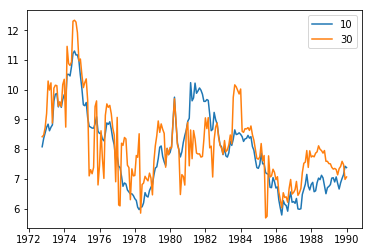

In [126]:
pyplot.plot(nelson_siegel_svensson(10.0, *[df[i] for i in ["beta0","beta1","beta2","beta3","tau1","tau2"]]).loc[:'1990-01-01'],label="10")
pyplot.plot(nelson_siegel_svensson(30.0, *[df[i] for i in ["beta0","beta1","beta2","beta3","tau1","tau2"]]).loc[:'1990-01-01'],label="30")
pyplot.legend()